<h1> <center> Second Lab <h1>

<h4>1- OF course, always the exhaustive search takes SO MUCH more time and iterations<h4>
</nh4>2- From the iteration perspective, Golden section search is not necessarily better than Dichotomy search, it depends on the function shape and derivative.<h4>
</nh4>3- Using the OPTIMIZED method of Golden section search (i.e. by reusing points from the previous iteration), would drastically decrease the complexity by minimizing the number of need function evaluations.

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [168]:
def exhaustive_search(f, a, b, eps):
    x_vals = np.arange(a, b + eps, eps)
    tested_x = []
    f_evals = 0
    min_x = x_vals[0]
    min_val = f(min_x)
    tested_x.append(min_x);
    f_evals += 1
    for x in x_vals[1:]:
        val = f(x);
        tested_x.append(x);
        f_evals += 1
        if val < min_val:
            min_val = val;
            min_x = x
    iterations = f_evals
    return min_x, min_val, iterations, f_evals, np.array(tested_x)

In [169]:
def dichotomy(f, a, b, eps, delta=1e-5):
    iterations = 0;
    f_evals = 0;
    tested_x = []
    while (b - a) > eps:
        mid = (a + b) / 2
        x1 = mid - delta;
        x2 = mid + delta
        f1 = f(x1);
        f2 = f(x2)
        tested_x.extend([x1, x2]);
        f_evals += 2;
        iterations += 1
        if f1 < f2:
            b = x2
        else:
            a = x1
    x_min = (a + b) / 2
    f_min = f(x_min);
    tested_x.append(x_min);
    f_evals += 1
    return x_min, f_min, iterations, f_evals, np.array(tested_x)

In [170]:
def golden_section(f, a, b, eps):
    phi = (1 + np.sqrt(5)) / 2
    resphi = 2 - phi
    iterations = 0;
    f_evals = 0;
    tested_x = []
    x1 = a + resphi * (b - a);
    x2 = b - resphi * (b - a)
    f1 = f(x1);
    f2 = f(x2);
    tested_x.extend([x1, x2]);
    f_evals += 2
    while abs(b - a) > eps:
        iterations += 1
        if f1 < f2:
            b = x2
            x2 = x1;
            f2 = f1
            x1 = a + resphi * (b - a)
            f1 = f(x1);
            tested_x.append(x1)
        else:
            a = x1
            x1 = x2;
            f1 = f2
            x2 = b - resphi * (b - a)
            f2 = f(x2);
            tested_x.append(x2)
        f_evals += 1
    x_min = (a + b) / 2;
    f_min = f(x_min);
    tested_x.append(x_min);
    f_evals += 1
    return x_min, f_min, iterations, f_evals, np.array(tested_x)

In [171]:
def golden_no_reuse(f, a, b, eps):
    phi = (1 + np.sqrt(5)) / 2
    resphi = 2 - phi
    iterations = 0;
    f_evals = 0;
    tested_x = []
    x1 = a + resphi * (b - a);
    x2 = b - resphi * (b - a)
    f1 = f(x1);
    f2 = f(x2);
    tested_x.extend([x1, x2]);
    f_evals += 2
    while abs(b - a) > eps:
        iterations += 1
        if f1 < f2:
            b = x2
        else:
            a = x1
        x1 = a + resphi * (b - a);
        x2 = b - resphi * (b - a)
        f1 = f(x1);
        f2 = f(x2);
        tested_x.extend([x1, x2]);
        f_evals += 2
    x_min = (a + b) / 2;
    f_min = f(x_min);
    tested_x.append(x_min);
    f_evals += 1
    return x_min, f_min, iterations, f_evals, np.array(tested_x)

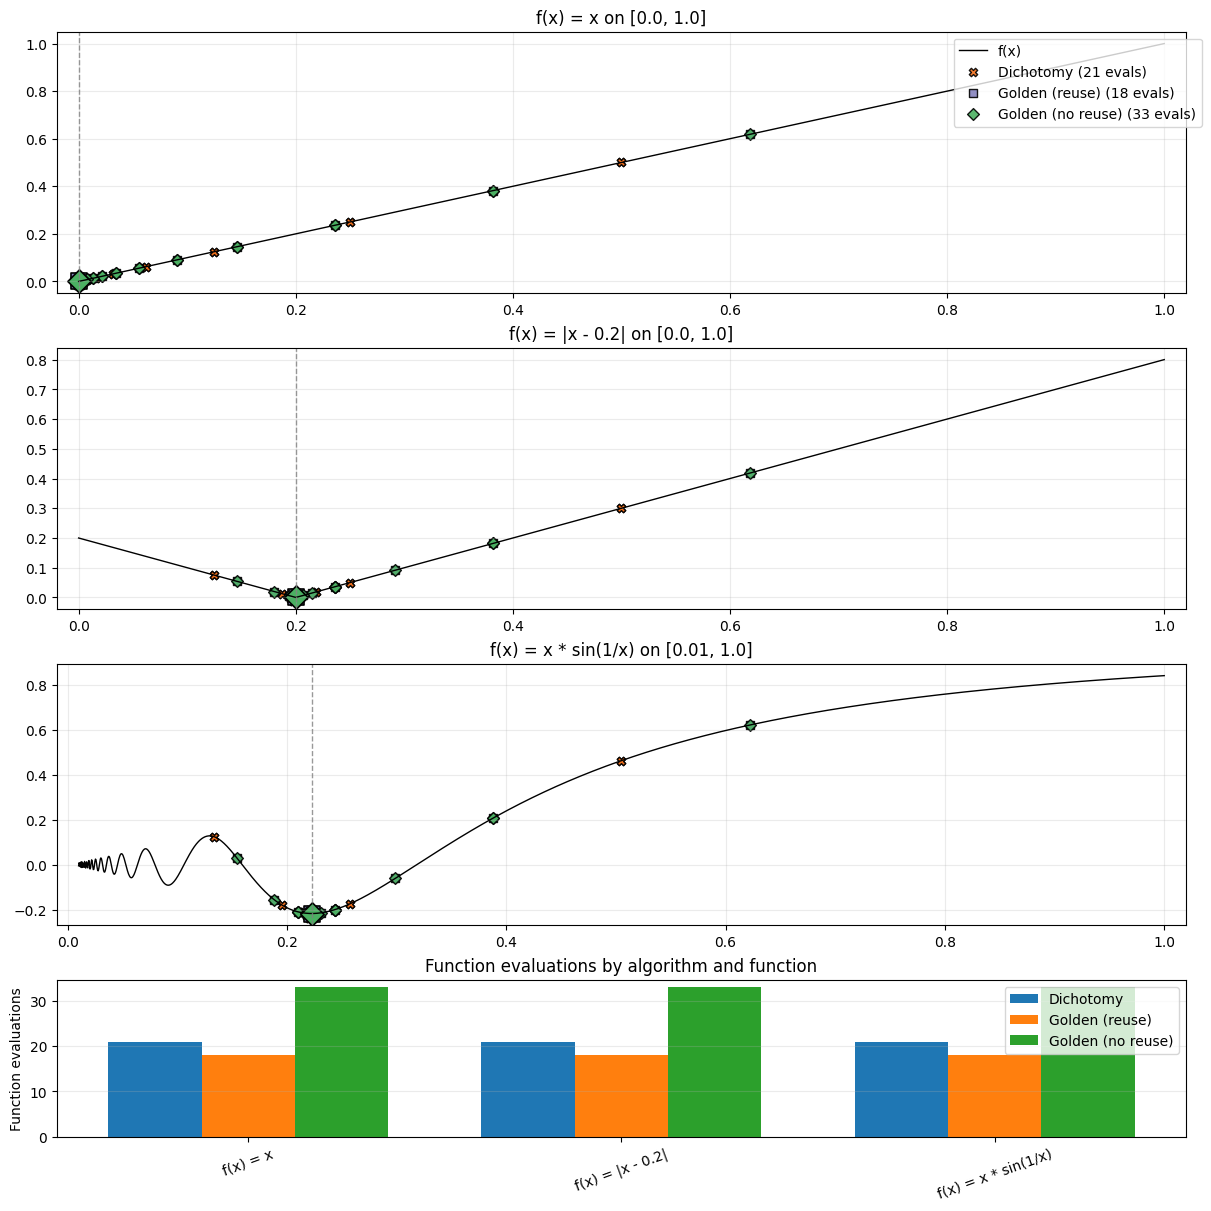

Function-evaluations table (rows = functions):
Function                                         Dichotomy        Golden (reuse)     Golden (no reuse)
f(x) = x                                                21                    18                    33
f(x) = |x - 0.2|                                        21                    18                    33
f(x) = x * sin(1/x)                                     21                    18                    33

Iterations table (rows = functions):
Function                                         Dichotomy        Golden (reuse)     Golden (no reuse)
f(x) = x                                                10                    15                    15
f(x) = |x - 0.2|                                        10                    15                    15
f(x) = x * sin(1/x)                                     10                    15                    15


In [172]:
f1 = lambda x: x
f2 = lambda x: np.abs(x - 0.2)
f3 = lambda x: x * np.sin(1 / x)
functions = [
    ("f(x) = x", f1, 0.0, 1.0),
    ("f(x) = |x - 0.2|", f2, 0.0, 1.0),
    ("f(x) = x * sin(1/x)", f3, 0.01, 1.0)
]

eps = 1e-3

algos = [
    ("Dichotomy", dichotomy, mpl.cm.Oranges, "X"),
    ("Golden (reuse)", golden_section, mpl.cm.Purples, "s"),
    ("Golden (no reuse)", golden_no_reuse, mpl.cm.Greens, "D"),
]

results = {fname: {"fevals": [], "iters": []} for fname, _, _, _ in functions}
per_func_algo_tested = {}

n_funcs = len(functions)
fig = plt.figure(constrained_layout=True, figsize=(12, 3 * n_funcs + 3))
gs = fig.add_gridspec(n_funcs + 1, 1, height_ratios=[1] * n_funcs + [0.6])

for i, (fname, f, a, b) in enumerate(functions):
    ax = fig.add_subplot(gs[i, 0])
    xs = np.linspace(a, b, 2000)
    ax.plot(xs, f(xs), color="black", lw=1, label="f(x)")

    per_func_algo_tested[fname] = {}

    for alg_name, alg_func, cmap, marker in algos:
        x_min, f_min, iters, fevals, tested = alg_func(f, a, b, eps)
        results[fname]["fevals"].append(fevals)
        results[fname]["iters"].append(iters)
        per_func_algo_tested[fname][alg_name] = tested
        color = cmap(0.6)
        ax.scatter(tested, f(tested), s=36, facecolors=color, edgecolors="k", marker=marker, alpha=0.9,
                   label=f"{alg_name} ({fevals} evals)")
        ax.scatter([x_min], [f_min], facecolors=color, edgecolors='k', s=140, marker=marker, linewidth=1.2)

    xs_ref = np.linspace(a, b, 20001)
    ref_x = xs_ref[np.nanargmin(f(xs_ref))]
    ax.axvline(ref_x, color='gray', linestyle='--', linewidth=1.0, alpha=0.8)

    ax.set_title(fname + f" on [{a}, {b}]")
    ax.set_xlim(a - 0.02 * (b - a), b + 0.02 * (b - a))
    ax.grid(alpha=0.25)
    if i == 0:
        ax.legend(loc='upper right', bbox_to_anchor=(1.02, 1.0))

ax_summary = fig.add_subplot(gs[n_funcs, 0])
x = np.arange(n_funcs)
width = 0.25
for j, (alg_name, _, _, _) in enumerate(algos):
    fevals = [results[fname]["fevals"][j] for fname, _, _, _ in functions]
    ax_summary.bar(x + (j - (len(algos) - 1) / 2) * width, fevals, width=width, label=alg_name)
ax_summary.set_xticks(x)
ax_summary.set_xticklabels([fname for fname, _, _, _ in functions], rotation=20)
ax_summary.set_ylabel("Function evaluations")
ax_summary.set_title("Function evaluations by algorithm and function")
ax_summary.legend()
ax_summary.grid(axis='y', alpha=0.25)

plt.show()

algos_simple = [(name, None) for name, _, _, _ in algos]
print("Function-evaluations table (rows = functions):")
header = "Function".ljust(36)
for alg_name, _ in algos_simple:
    header += f"{alg_name:>22}"
print(header)
for idx, fname in enumerate([fname for fname, _, _, _ in functions]):
    row = fname.ljust(36)
    for j, (alg_name, _, _, _) in enumerate(algos):
        row += f"{results[fname]['fevals'][j]:22d}"
    print(row)

print("\nIterations table (rows = functions):")
header = "Function".ljust(36)
for alg_name, _ in algos_simple:
    header += f"{alg_name:>22}"
print(header)
for idx, fname in enumerate([fname for fname, _, _, _ in functions]):
    row = fname.ljust(36)
    for j, (alg_name, _, _, _) in enumerate(algos):
        row += f"{results[fname]['iters'][j]:22d}"
    print(row)


<h1> <center> The Second Part "Minimization" <h1>

<h2> Important explanation <h2>
<h3> Hello professor Antony, well, you might see that the loss values are rather big, but actually there is an explanation for that, see, you told us to add noise (delta) which follows a certain distribution,N(0,1),  this means that <span style="color:blue">each y value is perturbed by noise with standard deviaton of  1</span>, and since we are summing aquared error over 101 points, it means that even if the model fits perfectly the expected loss is roughly :

 <center> E[Loss] = sum(delta_i)^2   0<=i<=100 ---> = 101* Var(delta) = 101* 1= 101



Further more, if you would like to test my code and see how it fits perfectly if there was no noise, just set the <span style="color:red">FLAG</span> to zero in the next cell :)

In [212]:
FLAG=1

<h3> Defining the modules <h3>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def linear_model(x, a, b):
    return a * x + b
def rational_model(x, a, b):
    return a / (1 + b * (x+1e-9))

<h3> Defining the error function <h3>

In [4]:
def loss(f, a, b, x, y):
    return np.sum((f(x, a, b) - y) ** 2)

<h3> Two-dimensional Exhautive search <h3>

In [5]:
def two_dim_exhaus(f, a0, a1, b0, b1, x, y, eps=1e-3):
    A_tr = np.arange(a0, a1, eps)
    B_tr = np.arange(b0, b1, eps)
    a_best, b_best = -1, -1
    min_val = 1e+3
    for q1 in A_tr:
        for q2 in B_tr:
            z = loss(f, q1, q2, x, y)
            if z < min_val:
                min_val = z
                a_best, b_best = q1, q2

    return a_best, b_best, min_val

<h3>  Coordinate descent search <h3>

In [6]:
def coordinate_descent(f, x, y, init_a, init_b, eps=1e-3):
    def exhaustive_search_2(f, a, b, x, y, var):
        if var == 0:
            a_vals = np.arange(a-1, a + 1, 1e-3)
            min_a = a_vals[0]
            min_val = loss(f, min_a, b, x, y)
            for z in a_vals[1:]:
                val = loss(f, z, b, x, y)
                if val < min_val:
                    min_val = val
                    min_a = z
            return min_a, b, 1
        else:
            b_vals = np.arange(b-1, b + 1, 1e-3)
            min_b = b_vals[0]
            min_val = loss(f, a, min_b, x, y)
            for z in b_vals[1:]:
                val = loss(f, a, z, x, y)
                if val < min_val:
                    min_val = val
                    min_b = z
            return  a, min_b, 0

    a, b = 1e+3, 1e+3
    a_best, b_best = init_a, init_b
    var = 0
    while abs(a_best - a) > eps or abs(b_best - b) > eps:
        a, b = a_best, b_best
        a_best, b_best, var = exhaustive_search_2(f, a, b, x, y, var)
    return a_best, b_best


<h3>  Nelder mead <h3>

In [7]:
def nelder_mead(f, arr, x, y):
    def cal_loss(f, x, y, arr):
        return np.array([loss(f, p[0], p[1], x, y) for p in arr])

    def mysort(f, x, y, simplex_arr):
        losses_arr = cal_loss(f, x, y, simplex_arr)
        sorted_indices = np.argsort(losses_arr)
        sorted_simplex = [simplex_arr[i] for i in sorted_indices]
        sorted_losses = losses_arr[sorted_indices]
        return sorted_simplex, sorted_losses

    def grav_cen(u, v):
        return (u + v) / 2

    def refl(w, xc, alpha=1):
        return (1 + alpha) * xc - alpha * w

    def expan(xc, xr, gamma=2):
        return (1 - gamma) * xc + gamma * xr

    def shrink(w, xc, beta=0.5):
        return beta * w + (1 - beta) * xc

    def glob_shrink(arr):
        return [arr[0],
                arr[0] + (arr[1] - arr[0]) / 2,
                arr[0] + (arr[2] - arr[0]) / 2]

    def conver_check(losses, tol=1e-3):
        return np.std(losses) < tol

    simplex = [arr,
               arr + np.array([1, 0]),
               arr + np.array([0, 1])]

    sorted_simplex, sorted_losses = mysort(f, x, y, simplex)
    trace = [np.vstack(simplex)]

    while not conver_check(sorted_losses):

        fl, fg, fh = sorted_losses
        xc = grav_cen(sorted_simplex[0], sorted_simplex[1])
        xr = refl(sorted_simplex[2], xc)
        fr = loss(f, xr[0], xr[1], x, y)

        if fr < fl:
            xe = expan(xc, xr)
            fe = loss(f, xe[0], xe[1], x, y)
            sorted_simplex[2] = xe if fe < fr else xr
        elif fl < fr < fg:
            sorted_simplex[2] = xr
        elif fg < fr < fh:
            sorted_simplex[2] = xr
            sorted_simplex, sorted_losses = mysort(f, x, y, sorted_simplex)
            xs = shrink(sorted_simplex[2], xc)
            fs = loss(f, xs[0], xs[1], x, y)
            if fs < sorted_losses[2]:
              sorted_simplex[2] = xs
        else:
            sorted_simplex = glob_shrink(sorted_simplex)
        sorted_simplex, sorted_losses = mysort(f, x, y, sorted_simplex)
        trace.append(np.vstack(sorted_simplex))

    return sorted_simplex[0],trace


<h3> In this cell, I will generate x and y, give the initial values for the neccecary parameters, and perform the three algorithms, USING THE LINEAR MODEL here.<h3>

In [8]:
np.random.seed(42)
alpha = np.random.rand()
beta = np.random.rand()

k = np.arange(101)
x = k / 100
delta = np.random.normal(0, 1, size=len(x))
y = alpha * x + beta + delta


a0, a1 = 0, 1   # initial values for estimating alpha
b0, b1 = 0, 1   # initial values for estimating beta
f = linear_model # chosen model to be used for  estimating

arr = np.array([a0, b0])
best_point, trace_lin = nelder_mead(f, arr, x, y)
a_best_nelder, b_best_nelder = float(best_point[0]), float(best_point[1])
a_best_co_des, b_best_co_des = coordinate_descent(f, x, y, a0, b0)
a_best_ex, b_best_ex, _ = two_dim_exhaus(f, a0, a1, b0, b1, x, y)
L_best_nelder,L_best_co_des,L_best_ex= loss(f, a_best_nelder, b_best_nelder , x, y),loss(f, a_best_co_des, b_best_co_des , x, y),loss(f, a_best_ex, b_best_ex , x, y)



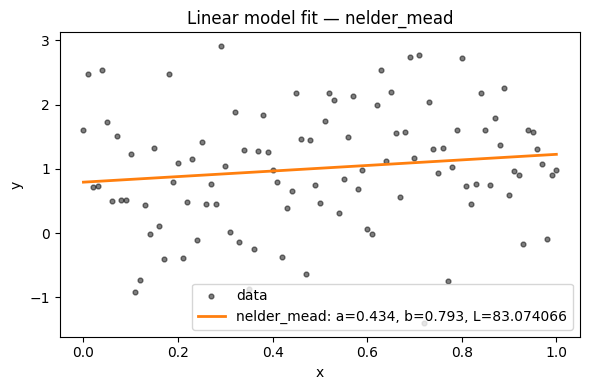

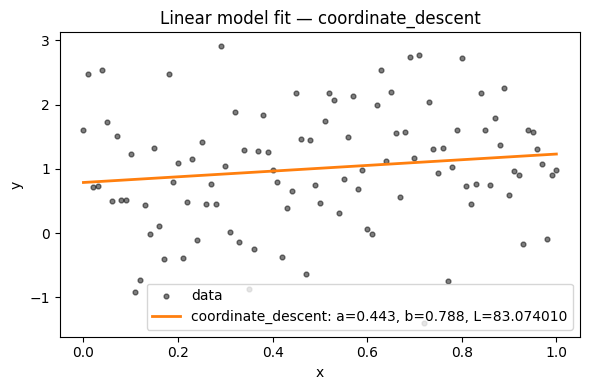

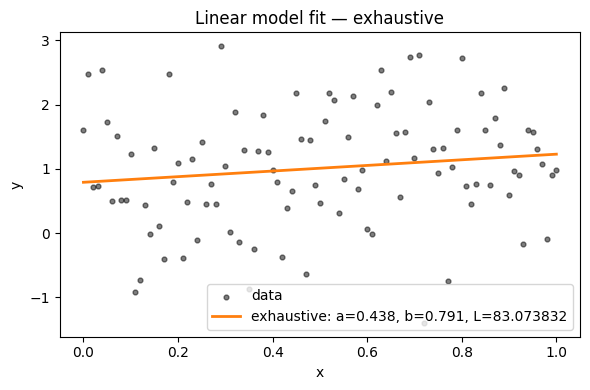

In [9]:
methods_lin = [
    ('nelder_mead', a_best_nelder, b_best_nelder, L_best_nelder),
    ('coordinate_descent', a_best_co_des, b_best_co_des, L_best_co_des),
    ('exhaustive', a_best_ex, b_best_ex, L_best_ex),
]

for method, a_est, b_est, L in methods_lin:
    plt.figure(figsize=(6,4))
    plt.scatter(x, y, s=12, color='k', alpha=0.5, label='data')
    plt.plot(x, linear_model(x, a_est, b_est), color='C1', lw=2,
             label=f"{method}: a={a_est:.3f}, b={b_est:.3f}, L={L:.6f}")
    plt.title(f"Linear model fit — {method}")
    plt.xlabel("x"); plt.ylabel("y")
    plt.legend(); plt.tight_layout()
    plt.show()


In [10]:
a0, a1 = 0, 1         # interval for estimating a in the a/(1+bx)
b0, b1 = -0.5, 1      # interval for estimating b in the a/(1+bx)
f = rational_model    # chosen model to be used for  estimating
arr = np.array([a0, b0])
best_point, trace_rat = nelder_mead(f, arr, x, y)
a_best_nelder_R, b_best_nelder_R = float(best_point[0]), float(best_point[1])
a_best_co_des_R, b_best_co_des_R = coordinate_descent(f, x, y, a0, b0)
a_best_ex_R, b_best_ex_R, _ = two_dim_exhaus(f, a0, a1, b0, b1, x, y)
L_best_nelder_R,L_best_co_des_R,L_best_ex_R= loss(f, a_best_nelder_R, b_best_nelder_R , x, y),loss(f, a_best_co_des_R, b_best_co_des_R , x, y),loss(f, a_best_ex_R, b_best_ex_R , x, y)



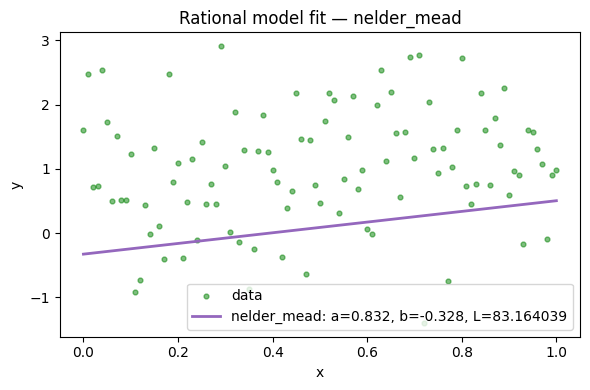

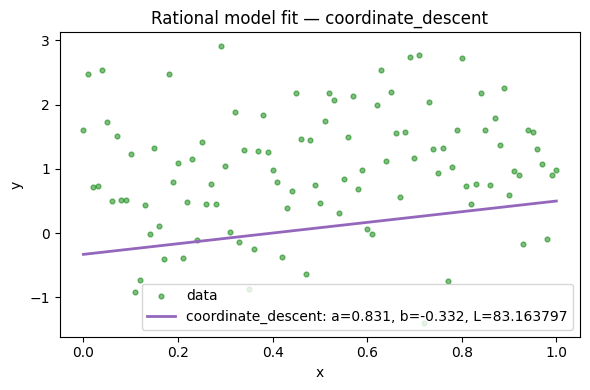

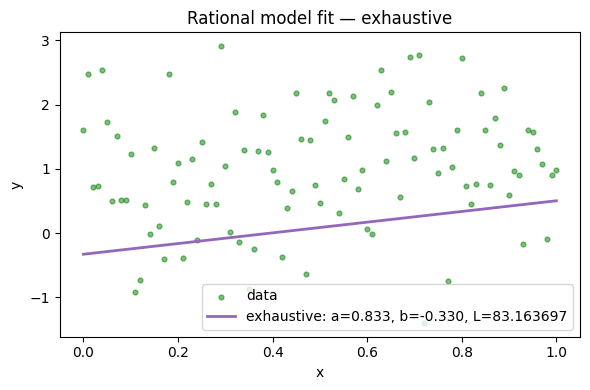

In [11]:
methods_rat = [
    ('nelder_mead', a_best_nelder_R, b_best_nelder_R, L_best_nelder_R),
    ('coordinate_descent', a_best_co_des_R, b_best_co_des_R, L_best_co_des_R),
    ('exhaustive', a_best_ex_R, b_best_ex_R, L_best_ex_R),
]

for method, a_est, b_est, L in methods_rat:
    plt.figure(figsize=(6,4))
    plt.scatter(x, y, s=12, color='g', alpha=0.5, label='data')
    plt.plot(x, linear_model(x, a_est, b_est), color='C4', lw=2,
             label=f"{method}: a={a_est:.3f}, b={b_est:.3f}, L={L:.6f}")
    plt.title(f"Rational model fit — {method}")
    plt.xlabel("x"); plt.ylabel("y")
    plt.legend(); plt.tight_layout()
    plt.show()


In [12]:
import pandas as pd
data = {
    'Algorithm': ['Nelder-Mead-loss', 'Coordinate Descent-loss', 'Exhaustive Search-loss'],
    'Linear model': [L_best_nelder, L_best_co_des, L_best_ex],
    'Rational model': [L_best_nelder_R, L_best_co_des_R, L_best_ex_R]
}

df = pd.DataFrame(data)
df['Linear model'] = df['Linear model'].astype(float)
df['Rational model'] = df['Rational model'].astype(float)


from IPython.display import display, HTML
display(df.style.format({'Linear model':'{:.6f}','Rational model':'{:.6f}'}).set_table_attributes("style='width:60%'"))


,Algorithm,Linear model,Rational model
0,Nelder-Mead-loss,83.074066,83.164039
1,Coordinate Descent-loss,83.074010,83.163797
2,Exhaustive Search-loss,83.073832,83.163697


<h3><center> discussing the results<h3>

<h4> Well, it makes sense the the loss is less when using the linear model, because out data actually follows a linear form.
of course, the exhaustive algorithm will give back the lowest loss, but it takes the most amount out of them.<h4>

<h3><center> The following code is just to show the steps of Nerlder Mead alg. it's cute :)

In [ ]:
from IPython.display import HTML


def animate_trace_no_centroid(trace, model_name='model', interval=300, xlabel='a', ylabel='b'):
    fig, ax = plt.subplots(figsize=(6,5))
    all_pts = np.vstack(trace)
    ax.set_xlim(all_pts[:,0].min() - 0.05, all_pts[:,0].max() + 0.05)
    ax.set_ylim(all_pts[:,1].min() - 0.05, all_pts[:,1].max() + 0.05)

    poly = Polygon(trace[0], closed=True, facecolor='C0', alpha=0.4, edgecolor='k')
    ax.add_patch(poly)
    pts_scatter = ax.scatter(trace[0][:,0], trace[0][:,1], c='k', s=30)
    best_sc = ax.scatter([], [], c='gold', s=70, edgecolor='k', label='best')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)

    def init():
        poly.set_xy(trace[0])
        pts_scatter.set_offsets(trace[0])
        losses = [loss(f, p[0], p[1], x, y) for p in trace[0]]
        best_idx = int(np.argmin(losses))
        best_sc.set_offsets([trace[0][best_idx]])
        ax.set_title(f'{model_name} — iter 0')
        return poly, pts_scatter, best_sc

    def update(i):
        simplex = trace[i]
        poly.set_xy(simplex)
        pts_scatter.set_offsets(simplex)
        losses = [loss(f, p[0], p[1], x, y) for p in simplex]
        best_idx = int(np.argmin(losses))
        best_sc.set_offsets([simplex[best_idx]])
        ax.set_title(f'{model_name} — iter {i+1}/{len(trace)}')
        return poly, pts_scatter, best_sc

    ani = FuncAnimation(fig, update, frames=len(trace), init_func=init, interval=interval, blit=False)
    plt.close(fig)
    return HTML(ani.to_jshtml())


In [21]:
animate_trace_no_centroid(trace_lin, model_name='linear', interval=250, xlabel='a', ylabel='b')


In [19]:
animate_trace_no_centroid(trace_rat, model_name='linear', interval=250)